In [45]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

In [46]:
# Importamos los datos
X_train = pd.read_csv("./DatosPisaSinNan/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosPisaSinNan/y_train.csv", sep=',', decimal='.')
X_val = pd.read_csv("./DatosPisaSinNan/X_val.csv", sep=',', decimal='.')
y_val = pd.read_csv("./DatosPisaSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosPisaSinNan/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosPisaSinNan/y_test.csv", sep=',', decimal='.')

Pasamos los dataframes a numpy array

In [47]:
feature_names = X_train.columns[:]

X_train = X_train.values
y_train = y_train.values



### Modelo Lasso, standard Scaler.


In [48]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.Normalizer().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XvalScaled = scaler.transform(X_val)
XtestScaled = scaler.transform(X_test)

best mean cross-validation score: -2524.393
best parameters: {'alpha': 0.03678379771828634}


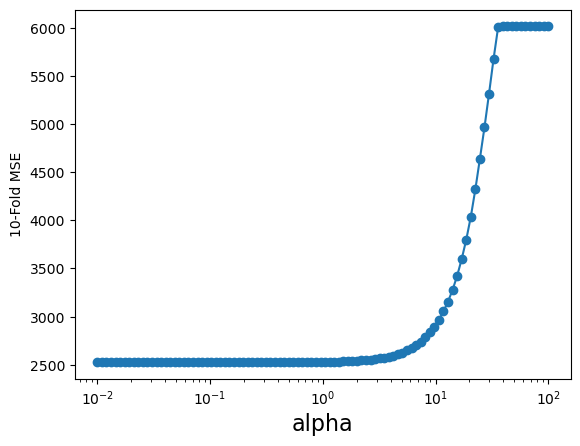

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#alpha_vector = np.logspace(-1.5,-0.5,20)
alpha_vector = np.logspace(-2,2,100)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

# Tarda 10 segundos

In [50]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso_st = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso_st = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso StandardScaler (train): %0.5g' % mseTrainModelLasso_st)
print('MSE Modelo Lasso StandardScaler (test) : %0.5g' % mseTestModelLasso_st)

print()

maeTrainModelLasso_st = mean_absolute_error(y_train,ytrainLasso)
maeTestModelLasso_st = mean_absolute_error(y_test,ytestLasso)

print('MAE Modelo Lasso StandardScaler (train): %0.5g' % maeTrainModelLasso_st)
print('MAE Modelo Lasso StandardScaler (test) : %0.5g' % maeTestModelLasso_st)

print()

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso Standart (train): 2517.1
MSE Modelo Lasso Standart (test) : 2549.5

MAE Modelo Lasso StandardScaler (train): 39.737
MAE Modelo Lasso StandardScaler (test) : 40.306

ST001D01T 2.5236915205189936
ST013Q01TA 8.549337718644576
ST127Q01TA -5.56834631891838
ST127Q02TA -1.8599417881793894
ST163Q02HA -1.1939432519046402
ST163Q03HA -0.5545183341060994
ST225Q03HA 3.508046526991057
ST225Q06HA 8.850434650549435
ST196Q02HA 10.65778224869491
IC152Q06HA 8.593759383362633
GRADE 0.37701956483525867
REPEAT -8.660232818501608
BSMJ 4.687920315415213
METASUM 11.402437915274964
METASPAM 16.971865246207297
SCREADCOMP 8.724945574392006
PISADIFF -10.621715899720234


In [51]:
# # Salvamos el modelo en formato pickle

# import pickle
# modeloLasso_save = pickle.dumps(lasso)

# modeloLasso_load = pickle.loads(modeloLasso_save)
# modeloLasso_load.predict(XtrainScaled[0:1])
# print(modeloLasso_load.predict(XtrainScaled[:]))
# print(y_train[0:])


In [52]:
# Salvamos el modelo en formato joblib

from joblib import dump, load
dump(lasso, 'modeloLasso_st.joblib') 
dump(scaler, 'lasso_scaler_st.joblib') 

clf = load('modeloLasso_st.joblib') 

clf.predict(XtrainScaled[0:1])
print(clf.predict(XtrainScaled[:]))
print(y_train[0:])

[544.43348057 517.49137796 621.99878228 ... 566.26416881 498.13560559
 445.26234994]
[[533.27055556]
 [483.98407778]
 [549.68306667]
 ...
 [546.41002222]
 [480.38326667]
 [380.72154444]]


### Modelo Lasso, Normalizer Scaler.

In [53]:


#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.Normalizer().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XvalScaled = scaler.transform(X_val)
XtestScaled = scaler.transform(X_test)

best mean cross-validation score: -3081.632
best parameters: {'alpha': 0.01}


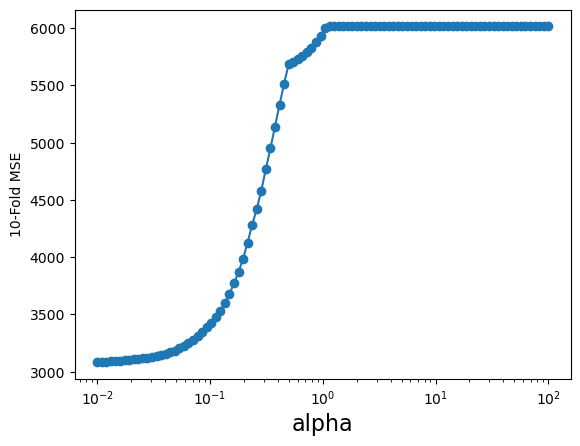

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#alpha_vector = np.logspace(-1.5,-0.5,20)
alpha_vector = np.logspace(-2,2,100)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

# Tarda 10 segundos

In [55]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso Normalizer (train): %0.5g' % mseTrainModelLasso)
print('MSE Modelo Lasso Normalizer (test) : %0.5g' % mseTestModelLasso)

print()

maeTrainModelLasso_nor = mean_absolute_error(y_train,ytrainLasso)
maeTestModelLasso_nor = mean_absolute_error(y_test,ytestLasso)

print('MAE Modelo Lasso Normalizer (train): %0.5g' % maeTrainModelLasso_nor)
print('MAE Modelo Lasso  Normalizer (test) : %0.5g' % maeTestModelLasso_nor)

print()

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso Normalizer (train): 3066
MSE Modelo Lasso Normalizer (test) : 3076.2

MAE Modelo Lasso Normalizer (train): 43.69
MAE Modelo Lasso  Normalizer (test) : 43.982

ST001D01T -557.9036390555535
ST013Q01TA 351.10767539680774
ST127Q01TA -219.71202882976453
ST127Q02TA -0.0
ST163Q02HA -42.549952617179095
ST163Q03HA -94.25347961942852
ST225Q03HA 40.053759059381576
ST225Q06HA 1101.497927283063
ST196Q02HA 537.2811113962496
IC152Q06HA 331.43325716428325
GRADE 694.4786701589117
REPEAT -1374.6370770144244
BSMJ -439.98277807601033
METASUM 688.0471682247859
METASPAM 1016.321707539841
SCREADCOMP 543.6317488857405
PISADIFF -689.844163495441


In [56]:
# Salvamos el modelo en formato joblib

from joblib import dump, load
dump(lasso, 'modeloLasso_nor.joblib') 
dump(scaler, 'lasso_scaler_nor.joblib') 

clf = load('modeloLasso_nor.joblib') 

clf.predict(XtrainScaled[0:1])
print(clf.predict(XtrainScaled[:]))
print(y_train[0:])

[539.68526175 520.4061233  580.95640419 ... 575.99898612 501.99190476
 445.89906478]
[[533.27055556]
 [483.98407778]
 [549.68306667]
 ...
 [546.41002222]
 [480.38326667]
 [380.72154444]]


#### Conclusión al Modelo Lasso.

La principal característica de regularizar aplicando Lasso, es que este algoritmo es capaz de eliminar coeficientes de variables que no aportan mucho en la caracterización de la variable target (PISA_SCORE_AV).
En este caso, vemos como ninguno de los coeficientes de las variables se a anulado, por lo que ninguna de ellas es redundante. 

El MSE de train y test nos indica que no hay overfitting al ser similares.

El MAE es relativamente bajo y la predicción del modelo será buena.

La standarización de las varibles nos ofrece mejores resultados que la normalización.


In [57]:
print('MAE Modelo Lasso standard scaler (train): %0.5g' % maeTrainModelLasso_st)
print('MAE Modelo Lasso standard scaler (test) : %0.5g' % maeTestModelLasso_st)
print()
print('MAE Modelo Lasso normalizer scaler (train): %0.5g' % maeTrainModelLasso_nor)
print('MAE Modelo Lasso normalizer scaler (test) : %0.5g' % maeTestModelLasso_nor)

MAE Modelo Lasso standard scaler (train): 39.737
MAE Modelo Lasso standard scaler (test) : 40.306

MAE Modelo Lasso normalizer scaler (train): 43.69
MAE Modelo Lasso normalizer scaler (test) : 43.982
